In [ ]:
# Necessary libraries
import numpy as np  # NumPy: for handling arrays and mathematical operations
import pandas as pd  # pandas: for handling tabular data (DataFrames)
import joblib  # joblib: for saving and loading the trained model
import xgboost as xgb  # xgboost: for the boosting model (XGBoost)
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV  # For splitting data, cross-validation, and hyperparameter search
from sklearn.svm import SVR  # SVR: Support Vector Regression
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor: for boosting-based regression model
from sklearn.neighbors import KNeighborsRegressor  # KNeighborsRegressor: for regression based on nearest neighbors
from sklearn.preprocessing import StandardScaler  # StandardScaler: for standardizing the data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer  # Metrics to evaluate the model
import statsmodels.api as sm  # statsmodels: for more advanced statistical models (such as OLS, time series models, etc.)


In [2]:
df_concat = pd.read_csv('../data/processed/happiness_dataset.csv')


find the variables per the model

In [3]:
df_concat.columns

Index(['happiness_rank', 'country', 'region', 'happiness_score',
       'economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'government_corruption', 'generosity', 'year'],
      dtype='object')

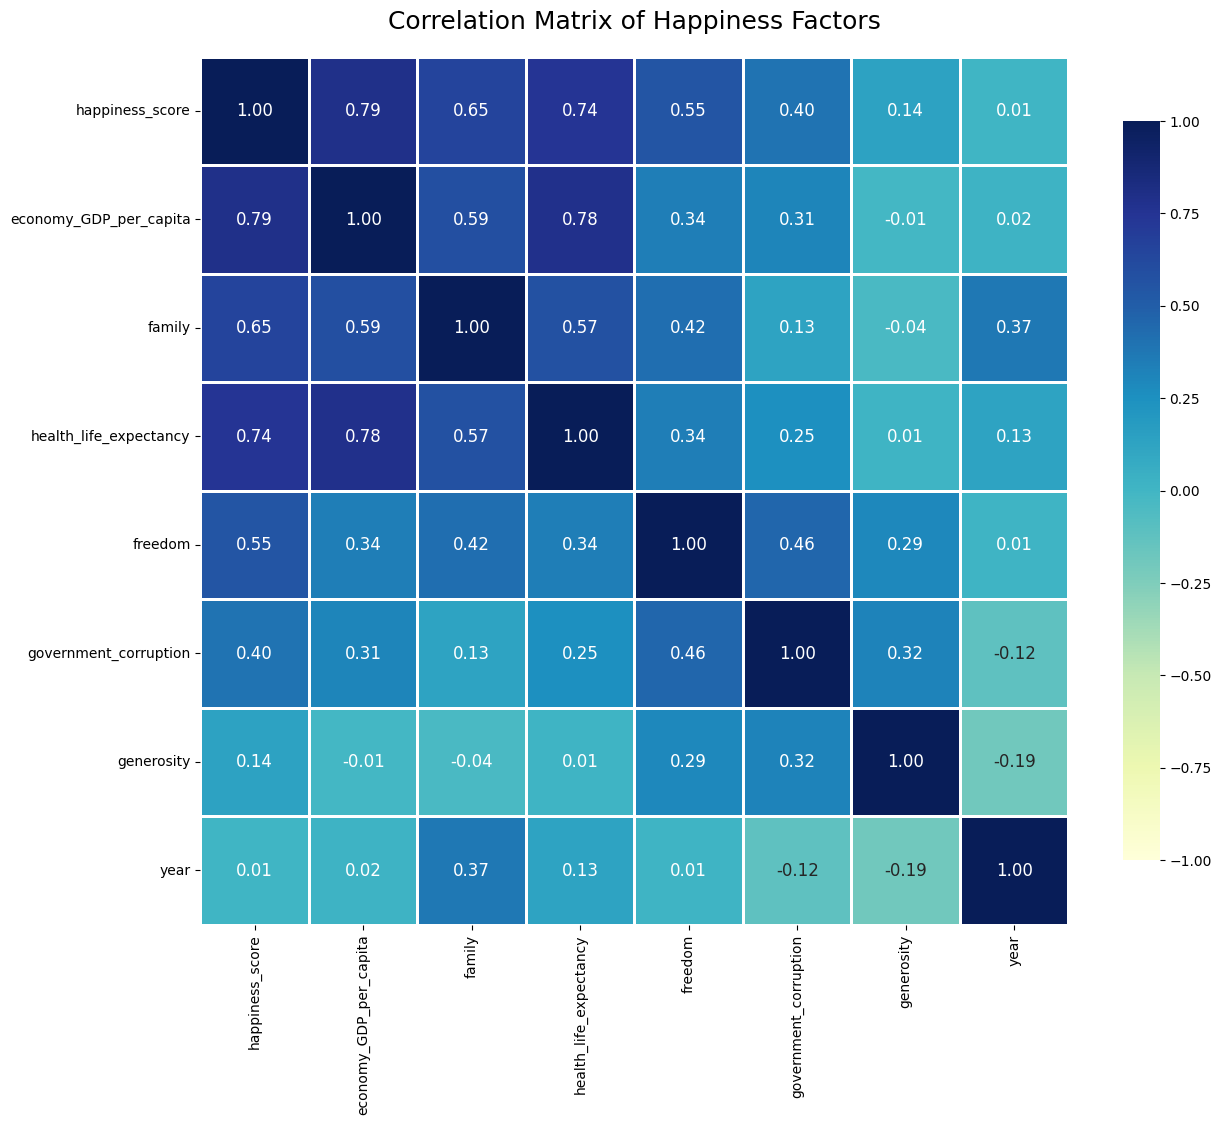

In [4]:
# Columns we want to analyze for their correlation with happiness score
columns_to_analyze = [
    'happiness_score', 
    'economy_GDP_per_capita', 
    'family', 
    'health_life_expectancy', 
    'freedom', 
    'government_corruption', 
    'generosity',
    'year'
]

# Filtering the DataFrame to only include the relevant columns
df_corr = df_concat[columns_to_analyze]

# Calculating the correlation matrix for the selected variables
correlation_matrix = df_corr.corr()

# Set the figure size for better visual presentation
plt.figure(figsize=(14, 12))  # Increase size for a larger, more readable plot

# Create the heatmap with refined style settings
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            linewidths=0.8, linecolor='white', cbar_kws={'shrink': 0.8},
            square=True, vmin=-1, vmax=1, annot_kws={'size': 12},  # Adjust text size for clarity
            cbar=True)  # Show the color bar

# Adding a clear and professional title
plt.title("Correlation Matrix of Happiness Factors", fontsize=18, pad=20)

# Display the plot
plt.show()

Feature: happiness_score
R² Score: 1.0000
Mean Squared Error: 0.0000
----------------------------------------
Feature: economy_GDP_per_capita
R² Score: 0.6230
Mean Squared Error: 0.4787
----------------------------------------
Feature: family
R² Score: 0.4209
Mean Squared Error: 0.7351
----------------------------------------
Feature: health_life_expectancy
R² Score: 0.5512
Mean Squared Error: 0.5697
----------------------------------------
Feature: freedom
R² Score: 0.3039
Mean Squared Error: 0.8837
----------------------------------------
Feature: government_corruption
R² Score: 0.1584
Mean Squared Error: 1.0684
----------------------------------------
Feature: generosity
R² Score: 0.0189
Mean Squared Error: 1.2455
----------------------------------------
Feature: year
R² Score: 0.0000
Mean Squared Error: 1.2695
----------------------------------------


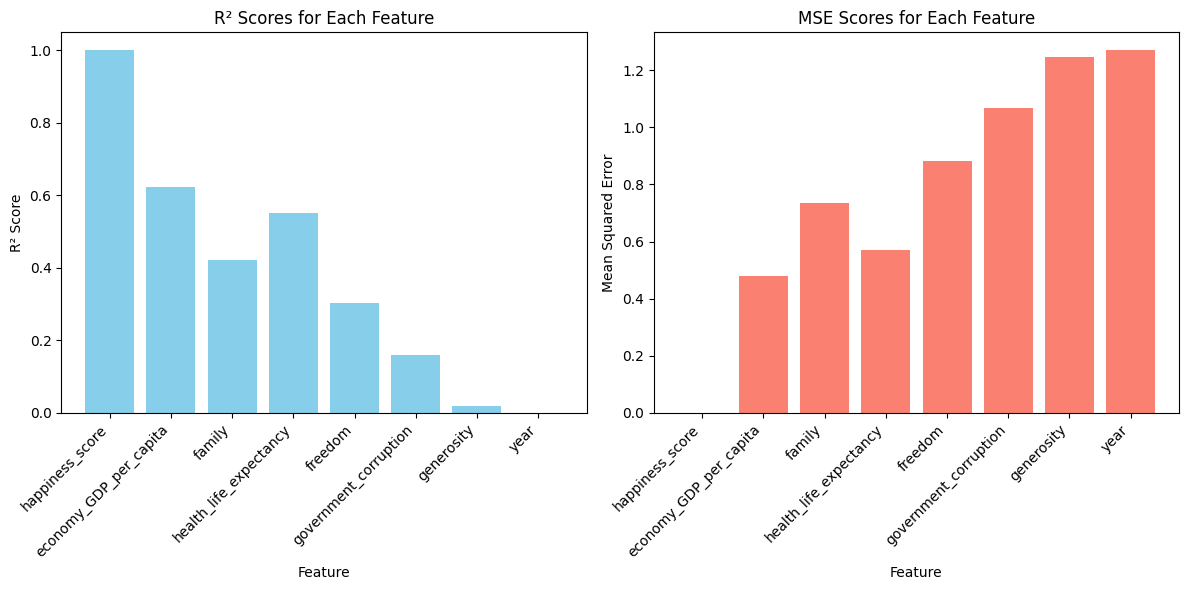

In [5]:
# Dependent variable
y = df_concat['happiness_score']

# Initialize the imputer to replace NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Initialize lists to store the results
r2_scores = []
mse_scores = []

# Evaluate each feature one by one
for column in columns_to_analyze:
    X = df_concat[[column]]  # Select one feature at a time
    
    # Impute missing values with the column mean
    X_imputed = imputer.fit_transform(X)
    
    # Initialize the model
    model = LinearRegression()
    
    # Fit the model to the data
    model.fit(X_imputed, y)
    
    # Make predictions
    y_pred = model.predict(X_imputed)
    
    # Calculate performance metrics
    r2 = r2_score(y, y_pred)  # R² score
    mse = mean_squared_error(y, y_pred)  # Mean Squared Error
    
    # Store the results
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    # Print the performance for the current feature
    print(f"Feature: {column}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print("-" * 40)

# Plot the R² scores and MSE scores for each feature
plt.figure(figsize=(12, 6))  # Increase figure size for better spacing

# Plot R² scores
plt.subplot(1, 2, 1)
plt.bar(columns_to_analyze, r2_scores, color='skyblue')
plt.title("R² Scores for Each Feature")
plt.xlabel("Feature")
plt.ylabel("R² Score")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot MSE scores
plt.subplot(1, 2, 2)
plt.bar(columns_to_analyze, mse_scores, color='salmon')
plt.title("MSE Scores for Each Feature")
plt.xlabel("Feature")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plots with adjusted layout
plt.tight_layout()
plt.show()


In [6]:
# Step 1: Define features and target for Model 1
# Model 1: Using only economy_GDP_per_capita and health_life_expectancy
X_1 = df_concat[['economy_GDP_per_capita', 'health_life_expectancy']]  # Features
y = df_concat['happiness_score']  # Target

# Train the model
model_1 = LinearRegression()
model_1.fit(X_1, y)

# Make predictions
y_pred_1 = model_1.predict(X_1)

# Calculate the performance metrics
r2_1 = r2_score(y, y_pred_1)
mse_1 = mean_squared_error(y, y_pred_1)

# Print the results for Model 1
print("Model with economy_GDP_per_capita and health_life_expectancy:")
print(f"R² Score: {r2_1:.4f}")
print(f"Mean Squared Error: {mse_1:.4f}")
print("-" * 40)

# Step 2: Model 2: Adding Family to the features
X_2 = df_concat[['economy_GDP_per_capita', 'health_life_expectancy', 'family']]  # Adding Family

# Train the model
model_2 = LinearRegression()
model_2.fit(X_2, y)

# Make predictions
y_pred_2 = model_2.predict(X_2)

# Calculate the performance metrics
r2_2 = r2_score(y, y_pred_2)
mse_2 = mean_squared_error(y, y_pred_2)

# Print the results for Model 2
print("Model with economy_GDP_per_capita, health_life_expectancy and family:")
print(f"R² Score: {r2_2:.4f}")
print(f"Mean Squared Error: {mse_2:.4f}")
print("-" * 40)

Model with economy_GDP_per_capita and health_life_expectancy:
R² Score: 0.6625
Mean Squared Error: 0.4284
----------------------------------------
Model with economy_GDP_per_capita, health_life_expectancy and family:
R² Score: 0.6987
Mean Squared Error: 0.3826
----------------------------------------


## Entrenamiento del modelo de machine learning

## Encontramos el mejor modelo

- Modelo de regresion Lineal 0.772

In [ ]:
# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Agregar un intercepto (bias) al modelo, como lo hace automáticamente R
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
# Ajustar un modelo de regresión lineal usando statsmodels
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.13e-243
Time:                        03:23:59   Log-Likelihood:                -624.54
No. Observations:                 782   AIC:                             1265.
Df Residuals:                     774   BIC:                             1302.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    168

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Agregar un intercepto (bias) al modelo, como lo hace automáticamente R
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
# Ajustar un modelo de regresión lineal usando statsmodels
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     418.2
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          4.18e-239
Time:                        03:24:00   Log-Likelihood:                -638.28
No. Observations:                 782   AIC:                             1291.
Df Residuals:                     775   BIC:                             1323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

- K-Nearest Neighbors
0.7765

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")



Adjusted R-squared: 0.7520
Approximate AIC: -266.68
Approximate BIC: -239.00


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\3858915593.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")

Adjusted R-squared: 0.7765
Approximate AIC: -292.01
Approximate BIC: -267.79


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\2575539384.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Approximate AIC: {aic:.2f}")
print(f"Approximate BIC: {bic:.2f}")

Adjusted R-squared: 0.7122
Approximate AIC: -235.55
Approximate BIC: -221.71


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\3960791641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


- Support Vector Regressor (SVR)
0.7951

In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo SVR
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Puedes ajustar los hiperparámetros C y epsilon
model_svr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")


Support Vector Regressor - R²: 0.7951
Support Vector Regressor - Adjusted R²: 0.7888
Support Vector Regressor - Approximate AIC: -304.35
Support Vector Regressor - Approximate BIC: -276.67


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\4062277083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo SVR
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Puedes ajustar los hiperparámetros C y epsilon
model_svr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")

Support Vector Regressor - R²: 0.7928
Support Vector Regressor - Adjusted R²: 0.7873
Support Vector Regressor - Approximate AIC: -303.73
Support Vector Regressor - Approximate BIC: -279.51


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\4216364609.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo SVR
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Puedes ajustar los hiperparámetros C y epsilon
model_svr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Support Vector Regressor - Approximate AIC: {aic:.2f}")
print(f"Support Vector Regressor - Approximate BIC: {bic:.2f}")

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\1770937285.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Support Vector Regressor - R²: 0.7773
Support Vector Regressor - Adjusted R²: 0.7724
Support Vector Regressor - Approximate AIC: -288.75
Support Vector Regressor - Approximate BIC: -267.99


- Gradient Boosting
0.7740

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Gradient Boosting Regressor - R²: {r2:.4f}")
print(f"Gradient Boosting Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Gradient Boosting Regressor - Approximate AIC: {aic:.2f}")
print(f"Gradient Boosting Regressor - Approximate BIC: {bic:.2f}")



C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\2175590646.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Gradient Boosting Regressor - R²: 0.7740
Gradient Boosting Regressor - Adjusted R²: 0.7670
Gradient Boosting Regressor - Approximate AIC: -281.35
Gradient Boosting Regressor - Approximate BIC: -253.67


In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"Gradient Boosting Regressor - R²: {r2:.4f}")
print(f"Gradient Boosting Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"Gradient Boosting Regressor - Approximate AIC: {aic:.2f}")
print(f"Gradient Boosting Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\155418246.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Gradient Boosting Regressor - R²: 0.7542
Gradient Boosting Regressor - Adjusted R²: 0.7477
Gradient Boosting Regressor - Approximate AIC: -263.61
Gradient Boosting Regressor - Approximate BIC: -239.39


- XGBoost Regressor
0.7705

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"XGBoost Regressor - R²: {r2:.4f}")
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\990933031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


XGBoost Regressor - R²: 0.7705
XGBoost Regressor - Adjusted R²: 0.7635
XGBoost Regressor - Approximate AIC: -277.75
XGBoost Regressor - Approximate BIC: -250.07


In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"XGBoost Regressor - R²: {r2:.4f}")
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")


XGBoost Regressor - R²: 0.7553
XGBoost Regressor - Adjusted R²: 0.7488
XGBoost Regressor - Approximate AIC: -264.61
XGBoost Regressor - Approximate BIC: -240.39


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\4151651741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R-squared ajustado, AIC y BIC aproximados
n = len(y_test)  # Número de observaciones
p = X_train.shape[1]  # Número de características
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
aic = n * np.log(mse) + 2 * (p + 1)
bic = n * np.log(mse) + np.log(n) * (p + 1)

print(f"XGBoost Regressor - R²: {r2:.4f}")
print(f"XGBoost Regressor - Adjusted R²: {adj_r2:.4f}")
print(f"XGBoost Regressor - Approximate AIC: {aic:.2f}")
print(f"XGBoost Regressor - Approximate BIC: {bic:.2f}")


XGBoost Regressor - R²: 0.6903
XGBoost Regressor - Adjusted R²: 0.6863
XGBoost Regressor - Approximate AIC: -215.32
XGBoost Regressor - Approximate BIC: -201.48


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\2572654684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


## Support Vector Regressor (SVR) es el mejor modelo y vamos a intentar mejorarlo - Mejor opcion 0.7951

- Estandarización de Características - 0.7951

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Estandarizar las características (aplicar StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar el modelo SVR
model_svr = SVR(kernel='rbf', C=1, epsilon=0.1)
model_svr.fit(X_train, y_train)

# Realizar predicciones y calcular métricas
y_pred = model_svr.predict(X_test)

# Calcular R², MSE y MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir resultados
print(f"Support Vector Regressor - R²: {r2:.4f}")
print(f"Support Vector Regressor - Mean Squared Error: {mse:.4f}")
print(f"Support Vector Regressor - Mean Absolute Error: {mae:.4f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\916459557.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Support Vector Regressor - R²: 0.7951
Support Vector Regressor - Mean Squared Error: 0.2558
Support Vector Regressor - Mean Absolute Error: 0.3872


- Optimización de Hiperparámetros - 0.8087

In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definir los parámetros para la búsqueda en cuadrícula (con solo 3 valores por parámetro)
param_grid = {
    'C': [0.1, 1, 10],                 # Valores de C
    'epsilon': [0.01, 0.1, 0.5],       # Valores de epsilon
    'kernel': ['rbf', 'linear'],       # Tipos de kernel
    'gamma': ['scale', 'auto', 0.1]    # Valores de gamma
}

# Crear el modelo SVR
svr = SVR()

# Realizar la búsqueda en cuadrícula con validación cruzada (cv=5)
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_svr = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_best = best_svr.predict(X_test)

# Evaluar el modelo
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Imprimir los resultados
print(f"SVR optimizado (GridSearch) - R² Score: {r2_best:.4f}")
print(f"SVR optimizado (GridSearch) - Mean Squared Error: {mse_best:.4f}")
print(f"SVR optimizado (GridSearch) - Mean Absolute Error: {mae_best:.4f}")



C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\3537068845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Mejores parámetros encontrados: {'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
SVR optimizado (GridSearch) - R² Score: 0.8087
SVR optimizado (GridSearch) - Mean Squared Error: 0.2389
SVR optimizado (GridSearch) - Mean Absolute Error: 0.3673


- Ajuste de Hiperparámetros Avanzado (Grid Search o Randomized Search) 0.7608

In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Definir los parámetros para la búsqueda aleatoria (con un espacio de búsqueda reducido)
param_dist = {
    'C': np.logspace(-1, 1, 3),         # Reducir a 3 valores
    'epsilon': np.linspace(0.1, 0.3, 3), # Reducir a 3 valores
    'kernel': ['rbf'],                   # Mantener solo un kernel
    'gamma': ['scale', 0.1]              # Reducir a 2 valores
}

# Crear el modelo SVR
svr = SVR()

# Realizar la búsqueda aleatoria con validación cruzada (usando 3 folds)
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params_random = random_search.best_params_
print(f"Mejores parámetros encontrados con RandomizedSearchCV: {best_params_random}")

# Entrenar el modelo con los mejores parámetros
best_svr_random = random_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_best_random = best_svr_random.predict(X_test)

# Evaluar el modelo
r2_best_random = r2_score(y_test, y_pred_best_random)
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)

# Imprimir los resultados
print(f"SVR optimizado (RandomizedSearch) - R² Score: {r2_best_random:.4f}")
print(f"SVR optimizado (RandomizedSearch) - Mean Squared Error: {mse_best_random:.4f}")
print(f"SVR optimizado (RandomizedSearch) - Mean Absolute Error: {mae_best_random:.4f}")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\135137738.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
c:\Users\NITRO 5\Desktop\Workshop-003-ETL\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados con RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': np.float64(0.3), 'C': np.float64(10.0)}
SVR optimizado (RandomizedSearch) - R² Score: 0.7608
SVR optimizado (RandomizedSearch) - Mean Squared Error: 0.2987
SVR optimizado (RandomizedSearch) - Mean Absolute Error: 0.4186


- Escalado de Características StandardScaler 0.8085

In [ ]:

# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Estandarizar las características con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Crear el modelo SVR
model_svr = SVR(kernel='rbf', C=10, epsilon=0.1)

# Entrenar el modelo
model_svr.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_svr.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
print(f"SVR con StandardScaler - R² Score: {r2:.4f}")
print(f"SVR con StandardScaler - Mean Squared Error: {mse:.4f}")
print(f"SVR con StandardScaler - Mean Absolute Error: {mae:.4f}")


SVR con StandardScaler - R² Score: 0.8085
SVR con StandardScaler - Mean Squared Error: 0.2391
SVR con StandardScaler - Mean Absolute Error: 0.3679


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\1840775760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


- Validacion cruzada 0.8321

In [ ]:


# Seleccionar las características y la variable objetivo
X = df_concat[['economy_GDP_per_capita', 'family', 'health_life_expectancy', 'freedom', 'government_corruption', 'generosity', 'year']]
y = df_concat['happiness_score']

# Rellenar valores NaN en X e y con la media de cada columna
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Estandarizar las características con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVR
model_svr = SVR(kernel='rbf', C=10, epsilon=0.1)

# Realizar validación cruzada con 5 folds y calcular R² sobre el conjunto de entrenamiento
cv_scores_r2 = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring='r2')

# Realizar validación cruzada con 5 folds y calcular MSE (negativo, ya que cross_val_score devuelve valores negativos para MSE)
cv_scores_mse = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Realizar validación cruzada con 5 folds y calcular MAE
mae_scorer = make_scorer(mean_absolute_error)  # Ahora importamos make_scorer
cv_scores_mae = cross_val_score(model_svr, X_train_scaled, y_train, cv=5, scoring=mae_scorer)

# Obtener el índice del fold con el mayor R²
best_r2_index = np.argmax(cv_scores_r2)
best_r2 = cv_scores_r2[best_r2_index]
best_mse = cv_scores_mse[best_r2_index]
best_mae = cv_scores_mae[best_r2_index]

# Imprimir los resultados del mejor fold
print(f"\nMejor fold según R²:")
print(f"R²: {best_r2:.4f}")
print(f"MSE (negativo): {best_mse:.4f}")
print(f"MAE: {best_mae:.4f}")

# Entrenar el modelo SVR con todo el conjunto de entrenamiento (para exportarlo)
model_svr.fit(X_train_scaled, y_train)

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model_svr, '../models/svr_model_cross_val.pkl')
print("\nModelo SVR exportado como svr_model_cross_val.pkl")


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_3956\66477697.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



Mejor fold según R²:
R²: 0.8321
MSE (negativo): -0.2198
MAE: 0.3728

Modelo SVR exportado como svr_model_cross_val.pkl


El mejor modelo es validacion cruzada